# 여쭤보기  
1. row가 너무 많은가? sampling을 해서 row 수를 줄여야 할까?  
2. 데이터 통합 먼저 진행해야할까?(변수 선정 먼저?data 통합 먼저?)    
3. 경기결과 nan인 값 확인해보니까 다 0이었음. 그냥 빼도 괜찮을까?  
**4. 선수 정보에서의 결측치는 아직 안 다룸. -> 어떻게 다루는 것이 좋을까?**     
5. 선수 이름 양식 이미 통일되었다고 봐도 될까?  
6. describe로 확인해보면 min이 0인 경우 많은데, 정규분포라고 가정해보면 99.7% 밖에 있는 값인데... 어쨌든 이상해보임. outlier라는 의심이 든다. 이 값들 어떻게 할까: 데이터 통합을 한 다음에 다 제거해버릴까?  
7.도대체 이 많은 변수들을 어찌해야할지 모르겠다............  

---

상위그룹, 중위그룹, 하위그룹 세 가지 그룹으로 나눠 비교가 가능하도록 하였다.  
승점 계산 실제 축구에서 하는 방식으로  
전처리 과정 더 필요할 것 같다.  

---

넥슨에서 제공하는 API를 이용해서 수집한 공식게임 상위 랭커들의 매치 정보에 대한 데이터 입니다.

목표: 주어진 데이터를 바탕으로 **게임의 승/패에 영향을 미치는 요인**에 대해 분석해주시고, 혹시 가능하다면 **승/패 예측 모형**을 만들어주세요.

- 사용가능한 변수가 꽤나 많은 만큼, 적절한 variable selection 이 필요할 것 같습니다.-> PCA를 통해서??
- 모든 데이터는 matchID 칼럼을 기준으로 통합될 수 있습니다. (동일한 row = 같은 매치 데이터)

## 1. `배경분석`      
### A. 프로젝트 배경  
고객: 게임 회사?게임 컨설팅 업체?  
수혜자: 게임을 잘 하고 싶은 경기자 
프로젝트 목적: **게임의 승패에 영향을 미치는 요인**을 분석(+가능하면 승패 예측 모형까지)  
  
### B. 데이터 배경  
이미 수집된 데이터를 바탕으로 진행  
선수 정보는 사용하려면 '강화'에 대한 것은 배제하고 사용해야 한다.  
시간에 대한 정보도 사용하기 힘들 것 같다.

---

## `데이터 불러오기` 
각 row가 나타내는 것이 한 사람의 경기자임.  
  
공격지표  
매치정보  
선수정보  
수비지표  
패스지표

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 공격지표

In [2]:
attack_data = pd.read_csv(r"D:\대학 활동\진로\학회\dsl\21-1\피파온라인4\공격지표.csv", index_col=0)
print(attack_data.shape)
attack_data.head()

(232130, 12)


,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골
matchID,,,,,,,,,,,,
1552303,0,3,1,0,1,0,0,0,1,0,0,0
1552304,0,3,2,0,0,0,0,0,3,0,0,0
1552305,0,3,1,0,2,0,0,0,0,0,0,0
1552306,1,9,6,0,1,0,1,0,4,0,0,0
1552307,0,2,0,0,0,0,0,0,0,0,0,0


### 2. 매치정보

In [3]:
match_data = pd.read_csv(r"D:\대학 활동\진로\학회\dsl\21-1\피파온라인4\매치정보.csv", index_col=0)
print(match_data.shape)
match_data.head()

(232130, 12)


,날짜,유저이름,경기결과,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점
matchID,,,,,,,,,,,,
1552303,2021-01-23T04:00:32,TeamKoreaNo1,패,0,1,0,0,84,2,51,1,3.63889
1552304,2021-01-23T03:49:12,SaddlerHS,패,0,1,0,0,87,0,51,0,3.52222
1552305,2021-01-23T03:38:04,워리어,패,0,0,0,0,75,1,40,0,4.31667
1552306,2021-01-23T03:25:26,울산이창욱,패,0,0,0,0,119,3,49,0,5.22778
1552307,2021-01-23T03:07:50,TeamKoreaNo1,패,0,0,0,0,85,0,49,1,3.76667


In [4]:
match_data['날짜']

matchID
1552303    2021-01-23T04:00:32
1552304    2021-01-23T03:49:12
1552305    2021-01-23T03:38:04
1552306    2021-01-23T03:25:26
1552307    2021-01-23T03:07:50
                  ...         
1784428    2021-01-11T01:48:52
1784429    2021-01-11T01:38:00
1784430    2021-01-11T01:15:07
1784431    2021-01-11T01:03:43
1784432    2021-01-11T00:53:50
Name: 날짜, Length: 232130, dtype: object

### 3. 선수정보

In [5]:
player_data = pd.read_csv(r"D:\대학 활동\진로\학회\dsl\21-1\피파온라인4\선수정보.csv", index_col=0)
print(player_data.shape)
player_data.head()

(232130, 18)


,선수1,선수2,선수3,선수4,선수5,선수6,선수7,선수8,선수9,선수10,선수11,선수12,선수13,선수14,선수15,선수16,선수17,선수18
matchID,,,,,,,,,,,,,,,,,,
1552303,김두현,홍명보,조원희,유상철,M. 페르난데스,페테르 굴라치,정산,김신욱,홍철,손흥민,신세계,알레시오 크라뇨,고광민,권용현,알렉스,폴 베르나르도니,에밀 아우데로,김민재
1552304,에마뉘엘 프티,파벨 네드베드,크리스티아누 호날두,티아구 실바,카일 워커,카밀 글리크,티보 쿠르투아,마티아스 치머만,손흥민,토마시 쿠베크,마우로 이카르디,레뱅 퀴르자와,라파엘 바란,루드 굴리트,폴 베르나르도니,테오 에르난데스,이르지 파블렌카,주앙 펠릭스
1552305,미하엘 발락,파벨 네드베드,스티븐 제라드,크리스티아누 호날두,호나우두,Z. 이브라히모비치,페페,카림 벤제마,아르투로 비달,제롬 보아텡,차범근,티보 쿠르투아,손흥민,프랑크 레이카르트,루드 굴리트,미카엘 라우드루프,페를랑 멘디,테오 에르난데스
1552306,파벨 네드베드,에마뉘엘 프티,미하엘 발락,야프 스탐,호나우두,Z. 이브라히모비치,가레스 베일,이반 페리시치,패트릭 반안홀트,파울리뉴,루카시 흐라데키,조엘 마티프,토마시 홀리,버질 반데이크,세르주 그나브리,루드 굴리트,로드리,리스 제임스
1552307,김두현,홍명보,조원희,유상철,페테르 굴라치,정산,김신욱,홍철,손흥민,신세계,고광민,케빈 호드리게스,권용현,페드루 엔히키,A. 사나브리아,폴 베르나르도니,에밀 아우데로,김민재


### 4. 수비지표

In [6]:
defence_data = pd.read_csv(r"D:\대학 활동\진로\학회\dsl\21-1\피파온라인4\수비지표.csv", index_col=0)
print(defence_data.shape)
defence_data.head()

(232130, 4)


,블락시도,블락성공,태클시도,태클성공
matchID,,,,
1552303,8,0,5,0
1552304,8,1,17,9
1552305,14,1,29,10
1552306,10,0,26,8
1552307,13,0,7,4


### 5. 패스지표

In [7]:
pass_data = pd.read_csv(r"D:\대학 활동\진로\학회\dsl\21-1\피파온라인4\패스지표.csv", index_col=0)
print(pass_data.shape)
pass_data.head()

(232130, 10)


,패스시도,패스성공,숏패스시도,숏패스성공,롱패스시도,롱패스성공,쓰루패스시도,쓰루패스성공,드리븐패스시도,드리븐패스성공
matchID,,,,,,,,,,
1552303,125,114,94,90,7,6,17,13,6,5
1552304,114,103,81,73,8,8,21,19,3,3
1552305,94,83,71,64,12,9,7,7,4,3
1552306,164,147,141,131,3,1,10,8,9,7
1552307,120,107,91,89,1,0,19,12,9,6


## 2. `일변량 분석`    
- 변수 하나하나에 대한 분석  
- 데이터를 전체적으로 살펴보기(개괄, 키, 형태, 결측치, 대표값(중위값과 평균값의 비교), 분포도(수치화와 시각화), 아웃라이어)  
- 범주형: 무조건 barplot
- 개괄: head()  
- 형태: np.shape()  
- 결측치, 중복치: isnull(), duplicated()  
- 대표값: np.mean(), np.median()  
- 수치화 요약: data.describe(), 표준편차  
- 시각화: 박스플롯(이상치 파악), 히스토그램(정규성 확인)   

**팁**  
from pandas_profiling import ProfileReport

ProfileReport(df)

## `데이터 전처리`
- 결측치

In [8]:
# 공격지표 데이터 결측치 확인
attack_data.isnull().sum()

득점수     0
전체슈팅    0
유효슈팅    0
자살골     0
헤딩슛     0
헤딩골     0
프리킥     0
프리킥골    0
중거리슛    0
중거리골    0
패널티킥    0
패널티골    0
dtype: int64

In [9]:
# 매치정보 데이터 결측치 확인
match_data.isnull().sum()

날짜         0
유저이름       0
경기결과       2
파울         0
부상         0
레드카드       0
옐로카드       0
드리블횟수      0
코너킥횟수      0
점유율        0
오프사이드횟수    0
평점         0
dtype: int64

경기 결과 결측치 2개

In [10]:
# 결측치들의 index
missing_index = match_data.경기결과[match_data.경기결과.isnull()].index
missing_index

Int64Index([1762259, 1762270], dtype='int64', name='matchID')

In [11]:
# 결측치가 존재하는 행 뽑아보기
match_data.loc[[1762259, 1762270], :]

,날짜,유저이름,경기결과,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점
matchID,,,,,,,,,,,,
1762259,2019-08-05T23:40:20,가슴이줄라탄탄,NaN,0,0,0,0,0,0,0,0,0.0
1762270,2019-08-04T23:08:16,Getmad,NaN,0,0,0,0,0,0,0,0,0.0


In [12]:
#** 다른 정보도 같이 확인해봐야겠다**  
print(attack_data.loc[[1762259, 1762270], :])
print()
print(match_data.loc[[1762259, 1762270], :])
print(attack_data.loc[[1762259, 1762270], :])
print()
print(player_data.loc[[1762259, 1762270], :])
print(attack_data.loc[[1762259, 1762270], :])
print()
print(defence_data.loc[[1762259, 1762270], :])
print(attack_data.loc[[1762259, 1762270], :])
print()
print(pass_data.loc[[1762259, 1762270], :])

         득점수  전체슈팅  유효슈팅  자살골  헤딩슛  헤딩골  프리킥  프리킥골  중거리슛  중거리골  패널티킥  패널티골
matchID                                                                   
1762259    0     0     0    0    0    0    0     0     0     0     0     0
1762270    0     0     0    0    0    0    0     0     0     0     0     0

                          날짜     유저이름 경기결과  파울  부상  레드카드  옐로카드  드리블횟수  코너킥횟수  \
matchID                                                                        
1762259  2019-08-05T23:40:20  가슴이줄라탄탄  NaN   0   0     0     0      0      0   
1762270  2019-08-04T23:08:16   Getmad  NaN   0   0     0     0      0      0   

         점유율  오프사이드횟수   평점  
matchID                     
1762259    0        0  0.0  
1762270    0        0  0.0  
         득점수  전체슈팅  유효슈팅  자살골  헤딩슛  헤딩골  프리킥  프리킥골  중거리슛  중거리골  패널티킥  패널티골
matchID                                                                   
1762259    0     0     0    0    0    0    0     0     0     0     0     0
1762270    0     0     0    0    0   

In [13]:
# 결측치 있는 행을 제거하자
attack_data.drop([1762259, 1762270])
match_data.drop([1762259, 1762270])
player_data.drop([1762259, 1762270])
defence_data.drop([1762259, 1762270])
pass_data.drop([1762259, 1762270])

,패스시도,패스성공,숏패스시도,숏패스성공,롱패스시도,롱패스성공,쓰루패스시도,쓰루패스성공,드리븐패스시도,드리븐패스성공
matchID,,,,,,,,,,
1552303,125,114,94,90,7,6,17,13,6,5
1552304,114,103,81,73,8,8,21,19,3,3
1552305,94,83,71,64,12,9,7,7,4,3
1552306,164,147,141,131,3,1,10,8,9,7
1552307,120,107,91,89,1,0,19,12,9,6
...,...,...,...,...,...,...,...,...,...,...
1784428,94,83,56,52,15,13,20,17,1,1
1784429,104,89,76,70,9,5,15,11,3,3
1784430,124,114,97,92,1,1,13,9,12,12


In [14]:
# 선수정보 데이터 결측치 확인
player_data.isnull().sum()

선수1     2466
선수2     2493
선수3     2498
선수4     2557
선수5     2595
선수6     2523
선수7     2520
선수8     2504
선수9     2484
선수10    2477
선수11    2564
선수12    2549
선수13    2505
선수14    2507
선수15    2578
선수16    2552
선수17    2575
선수18    2679
dtype: int64

꽤 많음. 선수1~선수18의 결측치 개수가 비슷한 것으로 보아 한 행이 전체적으로 빠졌다라는 의심이 생김.->추후 확인해보자

In [15]:
# 수비지표 데이터 결측치 확인
defence_data.isnull().sum()

블락시도    0
블락성공    0
태클시도    0
태클성공    0
dtype: int64

In [16]:
# 패스지표 데이터 결측치 확인
pass_data.isnull().sum()

패스시도       0
패스성공       0
숏패스시도      0
숏패스성공      0
롱패스시도      0
롱패스성공      0
쓰루패스시도     0
쓰루패스성공     0
드리븐패스시도    0
드리븐패스성공    0
dtype: int64

-대표값  
평균, 중위값, 표준편차, describe 전체적으로 살펴보기

In [17]:
attack_data.describe()

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골
count,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000
mean,1.490647,4.997583,3.821242,0.019851,0.588873,0.117499,0.109585,0.011730,1.483096,0.263159,0.056305,0.042498
std,1.275695,2.757731,2.268888,0.143687,0.884956,0.353919,0.337943,0.108388,1.447179,0.538188,0.238266,0.206784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
max,22.000000,30.000000,28.000000,5.000000,9.000000,5.000000,5.000000,2.000000,21.000000,12.000000,4.000000,3.000000


In [18]:
match_data.describe()

,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점
count,232130.00000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000
mean,0.66592,0.149640,0.008142,0.060320,81.630703,1.329165,49.634007,0.355723,4.073216
std,0.86128,0.386913,0.092324,0.269243,21.644146,1.339432,8.053176,0.615005,0.616102
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,71.000000,0.000000,46.000000,0.000000,3.833330
50%,0.00000,0.000000,0.000000,0.000000,82.000000,1.000000,50.000000,0.000000,4.105560
75%,1.00000,0.000000,0.000000,0.000000,94.000000,2.000000,54.000000,1.000000,4.355560
max,11.00000,4.000000,3.000000,6.000000,198.000000,13.000000,100.000000,6.000000,6.544440


평점이 4.35점이면 상위 25% 안에 드는 것임.  
상위 25%안에 드는 것들만 뽑아서 분석해보고 싶다. best of best

In [19]:
player_data.describe()

,선수1,선수2,선수3,선수4,선수5,선수6,선수7,선수8,선수9,선수10,선수11,선수12,선수13,선수14,선수15,선수16,선수17,선수18
count,229664,229637,229632,229573,229535,229607,229610,229626,229646,229653,229566,229581,229625,229623,229552,229578,229555,229451
unique,4632,4680,4897,4998,5137,5265,5413,5413,5626,5680,5702,5859,5956,6080,6141,6221,6462,6773
top,파올로 말디니,미하엘 발락,미하엘 발락,호나우두,호나우두,호나우두,이반 페리시치,티보 쿠르투아,티보 쿠르투아,티보 쿠르투아,라파엘 바란,라파엘 바란,루드 굴리트,루드 굴리트,루드 굴리트,루드 굴리트,테오 에르난데스,에우제비우
freq,22208,21567,12911,10227,9674,7195,6231,8078,9627,10042,9722,10181,14445,17551,19270,16192,14349,17225


In [20]:
defence_data.describe()

,블락시도,블락성공,태클시도,태클성공
count,232130.000000,232130.000000,232130.000000,232130.000000
mean,7.048072,0.661871,13.623297,7.041460
std,3.488858,0.814234,6.634508,3.440828
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,9.000000,5.000000
50%,7.000000,0.000000,13.000000,7.000000
75%,9.000000,1.000000,18.000000,9.000000
max,31.000000,7.000000,57.000000,29.000000


In [21]:
pass_data.describe()

,패스시도,패스성공,숏패스시도,숏패스성공,롱패스시도,롱패스성공,쓰루패스시도,쓰루패스성공,드리븐패스시도,드리븐패스성공
count,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000,232130.000000
mean,107.026968,96.194266,79.829333,75.251484,4.985495,3.346944,18.054874,14.923681,3.029152,2.489769
std,28.962091,27.221288,26.212523,25.131924,3.265311,2.592989,8.022451,7.103808,2.897705,2.555270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,81.000000,64.000000,60.000000,3.000000,1.000000,13.000000,10.000000,1.000000,0.000000
50%,107.000000,96.000000,79.000000,75.000000,5.000000,3.000000,17.000000,14.000000,2.000000,2.000000
75%,123.000000,112.000000,95.000000,90.000000,7.000000,5.000000,23.000000,19.000000,4.000000,4.000000
max,289.000000,273.000000,262.000000,255.000000,68.000000,63.000000,85.000000,74.000000,36.000000,32.000000


유효슈팅, 드리블횟수, 블락시도, 태클시도, 태클성공

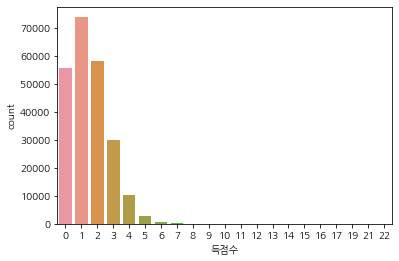

In [22]:
plt.rcParams['font.family'] = 'NanumGothic'   # 한글 깨짐 방지
sns.countplot(x="득점수", data = attack_data)
plt.show()

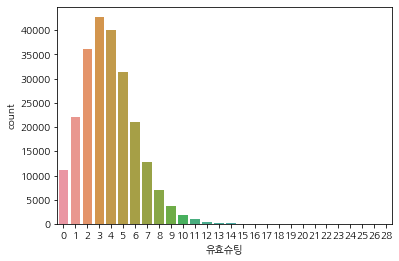

In [23]:
plt.rcParams['font.family'] = 'NanumGothic'   # 한글 깨짐 방지
sns.countplot(x="유효슈팅", data = attack_data)
plt.show()

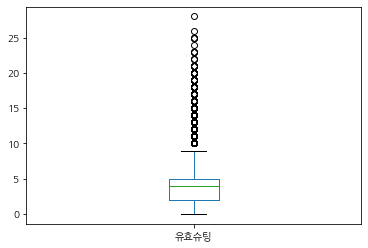

In [24]:
plt.rcParams['font.family'] = 'NanumGothic'   # 한글 깨짐 방지
attack_data.유효슈팅.plot(kind="box")
plt.show()

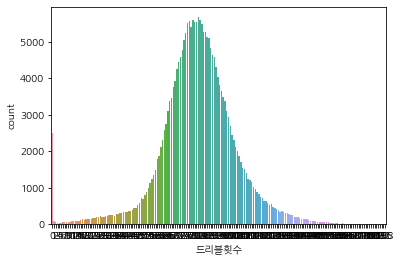

In [25]:
plt.rcParams['font.family'] = 'NanumGothic'   # 한글 깨짐 방지
sns.countplot(x="드리블횟수", data = match_data)
plt.show()

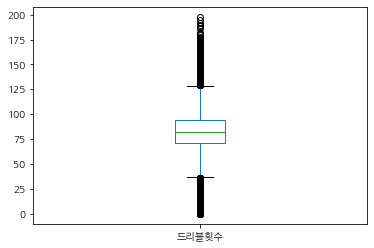

In [26]:
plt.rcParams['font.family'] = 'NanumGothic'   # 한글 깨짐 방지
match_data.드리블횟수.plot(kind="box")
plt.show()

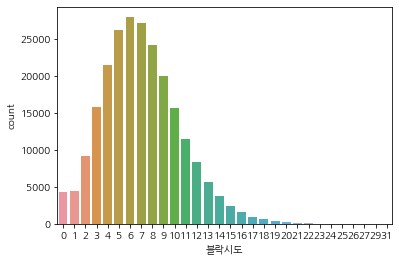

In [27]:
plt.rcParams['font.family'] = 'NanumGothic'   # 한글 깨짐 방지
sns.countplot(x="블락시도", data = defence_data)
plt.show()

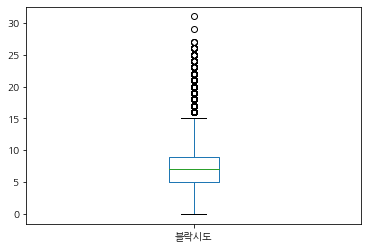

In [28]:
plt.rcParams['font.family'] = 'NanumGothic'   # 한글 깨짐 방지
defence_data.블락시도.plot(kind="box")
plt.show()

## `데이터 통합`

In [29]:
merged_data = pd.merge(attack_data, match_data, on="matchID", how="left")
merged_data

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,...,경기결과,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점
matchID,,,,,,,,,,,,,,,,,,,,,
1552303,0,3,1,0,1,0,0,0,1,0,...,패,0,1,0,0,84,2,51,1,3.63889
1552304,0,3,2,0,0,0,0,0,3,0,...,패,0,1,0,0,87,0,51,0,3.52222
1552305,0,3,1,0,2,0,0,0,0,0,...,패,0,0,0,0,75,1,40,0,4.31667
1552306,1,9,6,0,1,0,1,0,4,0,...,패,0,0,0,0,119,3,49,0,5.22778
1552307,0,2,0,0,0,0,0,0,0,0,...,패,0,0,0,0,85,0,49,1,3.76667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784428,2,8,5,0,2,0,0,0,1,0,...,승,0,0,0,0,70,4,50,0,4.32778
1784429,0,8,6,0,1,0,0,0,3,0,...,패,1,0,0,0,73,2,47,0,3.62778
1784430,1,8,6,0,0,0,1,0,2,0,...,패,0,1,0,0,91,5,51,0,3.57778


In [30]:
merged_data = pd.merge(merged_data, defence_data, on="matchID", how="left")
merged_data = pd.merge(merged_data, pass_data, on="matchID", how="left")
merged_data.shape

(232130, 38)

In [31]:
merged_data = pd.merge(merged_data, player_data, on="matchID", how="left")
merged_data.shape

(232130, 56)

In [32]:
merged_data

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,...,선수9,선수10,선수11,선수12,선수13,선수14,선수15,선수16,선수17,선수18
matchID,,,,,,,,,,,,,,,,,,,,,
1552303,0,3,1,0,1,0,0,0,1,0,...,홍철,손흥민,신세계,알레시오 크라뇨,고광민,권용현,알렉스,폴 베르나르도니,에밀 아우데로,김민재
1552304,0,3,2,0,0,0,0,0,3,0,...,손흥민,토마시 쿠베크,마우로 이카르디,레뱅 퀴르자와,라파엘 바란,루드 굴리트,폴 베르나르도니,테오 에르난데스,이르지 파블렌카,주앙 펠릭스
1552305,0,3,1,0,2,0,0,0,0,0,...,아르투로 비달,제롬 보아텡,차범근,티보 쿠르투아,손흥민,프랑크 레이카르트,루드 굴리트,미카엘 라우드루프,페를랑 멘디,테오 에르난데스
1552306,1,9,6,0,1,0,1,0,4,0,...,패트릭 반안홀트,파울리뉴,루카시 흐라데키,조엘 마티프,토마시 홀리,버질 반데이크,세르주 그나브리,루드 굴리트,로드리,리스 제임스
1552307,0,2,0,0,0,0,0,0,0,0,...,손흥민,신세계,고광민,케빈 호드리게스,권용현,페드루 엔히키,A. 사나브리아,폴 베르나르도니,에밀 아우데로,김민재
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784428,2,8,5,0,2,0,0,0,1,0,...,스티븐 제라드,크리스티아누 호날두,오카자키 신지,이스마일리,라파엘 바란,버질 반데이크,조지 새빌,루드 굴리트,잔루이지 돈나룸마,엄원상
1784429,0,8,6,0,1,0,0,0,3,0,...,파비우,하파엘,로멜루 루카쿠,데헤아,폴 포그바,마르코스 로호,루드 굴리트,로랑 블랑,마커스 래시포드,티모시 포수-멘사
1784430,1,8,6,0,0,0,1,0,2,0,...,패트릭 반안홀트,카일 워커,A. 드라고비치,네이마르 Jr.,루카시 흐라데키,라파엘 바란,버질 반데이크,세르주 그나브리,요나탄 타,프랑크 레이카르트


In [33]:
df = merged_data 
del merged_data

In [34]:
pd.set_option('display.max_columns', 100)
df.head(5)

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,날짜,유저이름,경기결과,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,블락성공,태클시도,태클성공,패스시도,패스성공,숏패스시도,숏패스성공,롱패스시도,롱패스성공,쓰루패스시도,쓰루패스성공,드리븐패스시도,드리븐패스성공,선수1,선수2,선수3,선수4,선수5,선수6,선수7,선수8,선수9,선수10,선수11,선수12,선수13,선수14,선수15,선수16,선수17,선수18
matchID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1552303,0,3,1,0,1,0,0,0,1,0,0,0,2021-01-23T04:00:32,TeamKoreaNo1,패,0,1,0,0,84,2,51,1,3.63889,8,0,5,0,125,114,94,90,7,6,17,13,6,5,김두현,홍명보,조원희,유상철,M. 페르난데스,페테르 굴라치,정산,김신욱,홍철,손흥민,신세계,알레시오 크라뇨,고광민,권용현,알렉스,폴 베르나르도니,에밀 아우데로,김민재
1552304,0,3,2,0,0,0,0,0,3,0,0,0,2021-01-23T03:49:12,SaddlerHS,패,0,1,0,0,87,0,51,0,3.52222,8,1,17,9,114,103,81,73,8,8,21,19,3,3,에마뉘엘 프티,파벨 네드베드,크리스티아누 호날두,티아구 실바,카일 워커,카밀 글리크,티보 쿠르투아,마티아스 치머만,손흥민,토마시 쿠베크,마우로 이카르디,레뱅 퀴르자와,라파엘 바란,루드 굴리트,폴 베르나르도니,테오 에르난데스,이르지 파블렌카,주앙 펠릭스
1552305,0,3,1,0,2,0,0,0,0,0,0,0,2021-01-23T03:38:04,워리어,패,0,0,0,0,75,1,40,0,4.31667,14,1,29,10,94,83,71,64,12,9,7,7,4,3,미하엘 발락,파벨 네드베드,스티븐 제라드,크리스티아누 호날두,호나우두,Z. 이브라히모비치,페페,카림 벤제마,아르투로 비달,제롬 보아텡,차범근,티보 쿠르투아,손흥민,프랑크 레이카르트,루드 굴리트,미카엘 라우드루프,페를랑 멘디,테오 에르난데스
1552306,1,9,6,0,1,0,1,0,4,0,0,0,2021-01-23T03:25:26,울산이창욱,패,0,0,0,0,119,3,49,0,5.22778,10,0,26,8,164,147,141,131,3,1,10,8,9,7,파벨 네드베드,에마뉘엘 프티,미하엘 발락,야프 스탐,호나우두,Z. 이브라히모비치,가레스 베일,이반 페리시치,패트릭 반안홀트,파울리뉴,루카시 흐라데키,조엘 마티프,토마시 홀리,버질 반데이크,세르주 그나브리,루드 굴리트,로드리,리스 제임스
1552307,0,2,0,0,0,0,0,0,0,0,0,0,2021-01-23T03:07:50,TeamKoreaNo1,패,0,0,0,0,85,0,49,1,3.76667,13,0,7,4,120,107,91,89,1,0,19,12,9,6,김두현,홍명보,조원희,유상철,페테르 굴라치,정산,김신욱,홍철,손흥민,신세계,고광민,케빈 호드리게스,권용현,페드루 엔히키,A. 사나브리아,폴 베르나르도니,에밀 아우데로,김민재


In [35]:
df.dtypes

득점수          int64
전체슈팅         int64
유효슈팅         int64
자살골          int64
헤딩슛          int64
헤딩골          int64
프리킥          int64
프리킥골         int64
중거리슛         int64
중거리골         int64
패널티킥         int64
패널티골         int64
날짜          object
유저이름        object
경기결과        object
파울           int64
부상           int64
레드카드         int64
옐로카드         int64
드리블횟수        int64
코너킥횟수        int64
점유율          int64
오프사이드횟수      int64
평점         float64
블락시도         int64
블락성공         int64
태클시도         int64
태클성공         int64
패스시도         int64
패스성공         int64
숏패스시도        int64
숏패스성공        int64
롱패스시도        int64
롱패스성공        int64
쓰루패스시도       int64
쓰루패스성공       int64
드리븐패스시도      int64
드리븐패스성공      int64
선수1         object
선수2         object
선수3         object
선수4         object
선수5         object
선수6         object
선수7         object
선수8         object
선수9         object
선수10        object
선수11        object
선수12        object
선수13        object
선수14        object
선수15        

## 3. `이변량 분석`  
**시각화**를 통해 판단하는 것이 좋다.  
### A. 연속 vs 연속  
산점도를 통해 상관관계를 파악할 수 있지만 상관계수는 선형적 상관관계만 파악할 수 있으므로 맹신x  
시각화는 산점도, 히트맵, 페어와이즈 산점도 등  
### B. 연속 vs 범주  
병렬 상자 그림이나 jittered scatter plot  
**groupby(), 피벗테이블**  
막대그림이나 박스플롯으로 시각화  
### C. 범주 vs 범주  
범주 대 범주는 많지 않다  
피벗테이블, groupby(), 모자이크 플롯  
  
=> 다변량 분석을 지향하자  

----

In [36]:
# 일단 날짜랑 선수 빼고 분석해보기
col1 = df['유저이름']
col2 = df['경기결과']
df1 = df.loc[:, df.dtypes != 'object']
df1

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,블락성공,태클시도,태클성공,패스시도,패스성공,숏패스시도,숏패스성공,롱패스시도,롱패스성공,쓰루패스시도,쓰루패스성공,드리븐패스시도,드리븐패스성공
matchID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1552303,0,3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,84,2,51,1,3.63889,8,0,5,0,125,114,94,90,7,6,17,13,6,5
1552304,0,3,2,0,0,0,0,0,3,0,0,0,0,1,0,0,87,0,51,0,3.52222,8,1,17,9,114,103,81,73,8,8,21,19,3,3
1552305,0,3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,75,1,40,0,4.31667,14,1,29,10,94,83,71,64,12,9,7,7,4,3
1552306,1,9,6,0,1,0,1,0,4,0,0,0,0,0,0,0,119,3,49,0,5.22778,10,0,26,8,164,147,141,131,3,1,10,8,9,7
1552307,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,0,49,1,3.76667,13,0,7,4,120,107,91,89,1,0,19,12,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784428,2,8,5,0,2,0,0,0,1,0,1,1,0,0,0,0,70,4,50,0,4.32778,10,1,7,4,94,83,56,52,15,13,20,17,1,1
1784429,0,8,6,0,1,0,0,0,3,0,0,0,1,0,0,0,73,2,47,0,3.62778,8,0,17,8,104,89,76,70,9,5,15,11,3,3
1784430,1,8,6,0,0,0,1,0,2,0,0,0,0,1,0,0,91,5,51,0,3.57778,9,0,11,5,124,114,97,92,1,1,13,9,12,12


In [37]:
df1['유저이름'] = col1
df1['경기결과'] = col2
df1

C:\Jupyter\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Jupyter\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,블락성공,태클시도,태클성공,패스시도,패스성공,숏패스시도,숏패스성공,롱패스시도,롱패스성공,쓰루패스시도,쓰루패스성공,드리븐패스시도,드리븐패스성공,유저이름,경기결과
matchID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1552303,0,3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,84,2,51,1,3.63889,8,0,5,0,125,114,94,90,7,6,17,13,6,5,TeamKoreaNo1,패
1552304,0,3,2,0,0,0,0,0,3,0,0,0,0,1,0,0,87,0,51,0,3.52222,8,1,17,9,114,103,81,73,8,8,21,19,3,3,SaddlerHS,패
1552305,0,3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,75,1,40,0,4.31667,14,1,29,10,94,83,71,64,12,9,7,7,4,3,워리어,패
1552306,1,9,6,0,1,0,1,0,4,0,0,0,0,0,0,0,119,3,49,0,5.22778,10,0,26,8,164,147,141,131,3,1,10,8,9,7,울산이창욱,패
1552307,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,0,49,1,3.76667,13,0,7,4,120,107,91,89,1,0,19,12,9,6,TeamKoreaNo1,패
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784428,2,8,5,0,2,0,0,0,1,0,1,1,0,0,0,0,70,4,50,0,4.32778,10,1,7,4,94,83,56,52,15,13,20,17,1,1,동래정씨,승
1784429,0,8,6,0,1,0,0,0,3,0,0,0,1,0,0,0,73,2,47,0,3.62778,8,0,17,8,104,89,76,70,9,5,15,11,3,3,도루왕나지완,패
1784430,1,8,6,0,0,0,1,0,2,0,0,0,0,1,0,0,91,5,51,0,3.57778,9,0,11,5,124,114,97,92,1,1,13,9,12,12,Sprezzatura92,패


In [38]:
# 비율정보로 바꾸기
# 패스시도->패스성공비율로 바꾸기
df1['패스성공비율'] = df1['패스성공'] / df1['패스시도']
df1['숏패스성공비율'] = df1['숏패스성공'] / df1['숏패스시도']
df1['롱패스성공비율'] = df1['롱패스성공'] / df1['롱패스시도']
df1['쓰루패스성공비율'] = df1['쓰루패스성공'] / df1['쓰루패스시도']
df1['드리븐패스성공비율'] = df1['드리븐패스성공'] / df1['드리븐패스시도']

# 수비시도->수비성공비율
df1['블락성공비율'] = df1['블락성공'] / df1['블락시도']
df1['태클성공비율'] = df1['태클성공'] / df1['태클시도']

del df1['패스성공']
del df1['숏패스성공'] 
del df1['롱패스성공'] 
del df1['쓰루패스성공'] 
del df1['드리븐패스성공']

del df1['블락성공'] 
del df1['태클성공'] 

C:\Jupyter\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Jupyter\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Jupyter\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [39]:
df1

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,유저이름,경기결과,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율
matchID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1552303,0,3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,84,2,51,1,3.63889,8,5,125,94,7,17,6,TeamKoreaNo1,패,0.912000,0.957447,0.857143,0.764706,0.833333,0.000000,0.000000
1552304,0,3,2,0,0,0,0,0,3,0,0,0,0,1,0,0,87,0,51,0,3.52222,8,17,114,81,8,21,3,SaddlerHS,패,0.903509,0.901235,1.000000,0.904762,1.000000,0.125000,0.529412
1552305,0,3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,75,1,40,0,4.31667,14,29,94,71,12,7,4,워리어,패,0.882979,0.901408,0.750000,1.000000,0.750000,0.071429,0.344828
1552306,1,9,6,0,1,0,1,0,4,0,0,0,0,0,0,0,119,3,49,0,5.22778,10,26,164,141,3,10,9,울산이창욱,패,0.896341,0.929078,0.333333,0.800000,0.777778,0.000000,0.307692
1552307,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,0,49,1,3.76667,13,7,120,91,1,19,9,TeamKoreaNo1,패,0.891667,0.978022,0.000000,0.631579,0.666667,0.000000,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784428,2,8,5,0,2,0,0,0,1,0,1,1,0,0,0,0,70,4,50,0,4.32778,10,7,94,56,15,20,1,동래정씨,승,0.882979,0.928571,0.866667,0.850000,1.000000,0.100000,0.571429
1784429,0,8,6,0,1,0,0,0,3,0,0,0,1,0,0,0,73,2,47,0,3.62778,8,17,104,76,9,15,3,도루왕나지완,패,0.855769,0.921053,0.555556,0.733333,1.000000,0.000000,0.470588
1784430,1,8,6,0,0,0,1,0,2,0,0,0,0,1,0,0,91,5,51,0,3.57778,9,11,124,97,1,13,12,Sprezzatura92,패,0.919355,0.948454,1.000000,0.692308,1.000000,0.000000,0.454545


In [40]:
# df1['헤딩성공비율'] = df1['헤딩골'] / df1['헤딩슛']
# df1['프리킥성공비율'] = df1['프리킥골'] / df1['프리킥']
# df1['중거리슛성공비율'] = df1['중거리골'] / df1['중거리슛']
# df1['패털티킥성공비율'] = df1['패널티골'] / df1['패널티킥']

In [41]:
# 얘네들은 개수 자체가 많지 않아서 그룹으로 나눠서 볼 때 제외하려고 함.
# del df1['헤딩슛']
# del df1['헤딩골'] 
# del df1['프리킥'] 
# del df1['프리킥골'] 
# del df1['중거리슛']
# del df1['중거리골']
# del df1['패널티킥']
# del df1['패널티골']
# del df1['자살골']

In [42]:
df1

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,유저이름,경기결과,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율
matchID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1552303,0,3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,84,2,51,1,3.63889,8,5,125,94,7,17,6,TeamKoreaNo1,패,0.912000,0.957447,0.857143,0.764706,0.833333,0.000000,0.000000
1552304,0,3,2,0,0,0,0,0,3,0,0,0,0,1,0,0,87,0,51,0,3.52222,8,17,114,81,8,21,3,SaddlerHS,패,0.903509,0.901235,1.000000,0.904762,1.000000,0.125000,0.529412
1552305,0,3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,75,1,40,0,4.31667,14,29,94,71,12,7,4,워리어,패,0.882979,0.901408,0.750000,1.000000,0.750000,0.071429,0.344828
1552306,1,9,6,0,1,0,1,0,4,0,0,0,0,0,0,0,119,3,49,0,5.22778,10,26,164,141,3,10,9,울산이창욱,패,0.896341,0.929078,0.333333,0.800000,0.777778,0.000000,0.307692
1552307,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,0,49,1,3.76667,13,7,120,91,1,19,9,TeamKoreaNo1,패,0.891667,0.978022,0.000000,0.631579,0.666667,0.000000,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784428,2,8,5,0,2,0,0,0,1,0,1,1,0,0,0,0,70,4,50,0,4.32778,10,7,94,56,15,20,1,동래정씨,승,0.882979,0.928571,0.866667,0.850000,1.000000,0.100000,0.571429
1784429,0,8,6,0,1,0,0,0,3,0,0,0,1,0,0,0,73,2,47,0,3.62778,8,17,104,76,9,15,3,도루왕나지완,패,0.855769,0.921053,0.555556,0.733333,1.000000,0.000000,0.470588
1784430,1,8,6,0,0,0,1,0,2,0,0,0,0,1,0,0,91,5,51,0,3.57778,9,11,124,97,1,13,12,Sprezzatura92,패,0.919355,0.948454,1.000000,0.692308,1.000000,0.000000,0.454545


In [43]:
df1.index

Int64Index([1552303, 1552304, 1552305, 1552306, 1552307, 1552308, 1552309,
            1552310, 1552311, 1552312,
            ...
            1784423, 1784424, 1784425, 1784426, 1784427, 1784428, 1784429,
            1784430, 1784431, 1784432],
           dtype='int64', name='matchID', length=232130)

In [44]:
df1['matchID'] = df1.index

C:\Jupyter\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
# 경기횟수 column 추가
matchnumber = df1.groupby('유저이름')['matchID'].count()
print(type(matchnumber))
matchnumber

<class 'pandas.core.series.Series'>


유저이름
0003ArsenalFC     4
000AC밀란000        2
000리오넬메시000       2
007TIKITAKA       1
00927             1
                 ..
힛곰잉               9
힛힛헷헷홋홋            4
힝녕녕              12
힝속았지              2
힝힝잏힝              1
Name: matchID, Length: 28397, dtype: int64

In [47]:
df_matchnumber = pd.DataFrame(matchnumber)
df_matchnumber

,matchID
유저이름,
0003ArsenalFC,4
000AC밀란000,2
000리오넬메시000,2
007TIKITAKA,1
00927,1
...,...
힛곰잉,9
힛힛헷헷홋홋,4
힝녕녕,12


In [48]:
df_matchnumber.rename(columns={"matchID": "count"}, inplace = True)
df_matchnumber

,count
유저이름,
0003ArsenalFC,4
000AC밀란000,2
000리오넬메시000,2
007TIKITAKA,1
00927,1
...,...
힛곰잉,9
힛힛헷헷홋홋,4
힝녕녕,12


In [49]:
df1[df1['유저이름'] == '힛곰잉']

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,유저이름,경기결과,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,matchID
matchID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1599411,3,7,6,0,0,0,0,0,2,2,0,0,1,0,0,0,104,1,53,0,3.71111,9,11,124,104,4,15,1,힛곰잉,패,0.927419,0.971154,0.500000,0.733333,1.0,0.111111,0.454545,1599411
1601977,2,4,3,0,0,0,0,0,2,1,0,0,1,0,0,0,95,0,46,0,3.96111,4,14,113,97,0,15,0,힛곰잉,무,0.929204,0.948454,NaN,0.866667,NaN,0.250000,0.428571,1601977
1628996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,41,0,3.43333,6,9,43,34,3,4,0,힛곰잉,패,0.790698,0.911765,0.333333,0.500000,NaN,0.500000,0.444444,1628996
1662093,2,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,78,2,47,1,4.17778,4,13,107,83,7,17,0,힛곰잉,승,0.878505,0.939759,0.571429,0.705882,NaN,0.250000,0.461538,1662093
1666111,4,9,5,0,0,0,0,0,3,1,0,0,0,0,0,0,125,2,58,1,4.26667,5,13,152,114,3,34,0,힛곰잉,무,0.907895,0.956140,0.333333,0.823529,NaN,0.000000,0.538462,1666111
1675752,2,3,2,0,0,0,0,0,1,0,0,0,2,1,0,0,74,1,41,0,3.76667,6,19,106,82,3,19,0,힛곰잉,패,0.820755,0.914634,0.333333,0.578947,NaN,0.000000,0.526316,1675752
1683567,3,7,7,0,0,0,0,0,1,0,0,0,2,1,0,0,86,4,46,0,3.85556,8,18,131,91,8,30,0,힛곰잉,패,0.847328,0.945055,0.625000,0.666667,NaN,0.125000,0.222222,1683567
1733079,1,7,6,0,1,0,0,0,3,0,0,0,2,0,0,0,86,1,45,0,3.99444,4,17,121,103,4,13,0,힛곰잉,패,0.925620,0.951456,1.000000,0.769231,NaN,0.000000,0.588235,1733079
1760594,1,4,3,0,0,0,0,0,2,0,0,0,0,0,0,0,72,1,43,0,4.03889,6,13,88,65,3,19,0,힛곰잉,무,0.863636,0.907692,0.333333,0.842105,NaN,0.000000,0.692308,1760594


In [50]:
# 경기횟수 column 추가
df2 = pd.merge(df1, df_matchnumber, on = '유저이름', how = "left")
df2

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,유저이름,경기결과,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,matchID,count
0,0,3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,84,2,51,1,3.63889,8,5,125,94,7,17,6,TeamKoreaNo1,패,0.912000,0.957447,0.857143,0.764706,0.833333,0.000000,0.000000,1552303,6
1,0,3,2,0,0,0,0,0,3,0,0,0,0,1,0,0,87,0,51,0,3.52222,8,17,114,81,8,21,3,SaddlerHS,패,0.903509,0.901235,1.000000,0.904762,1.000000,0.125000,0.529412,1552304,3
2,0,3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,75,1,40,0,4.31667,14,29,94,71,12,7,4,워리어,패,0.882979,0.901408,0.750000,1.000000,0.750000,0.071429,0.344828,1552305,13
3,1,9,6,0,1,0,1,0,4,0,0,0,0,0,0,0,119,3,49,0,5.22778,10,26,164,141,3,10,9,울산이창욱,패,0.896341,0.929078,0.333333,0.800000,0.777778,0.000000,0.307692,1552306,59
4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,0,49,1,3.76667,13,7,120,91,1,19,9,TeamKoreaNo1,패,0.891667,0.978022,0.000000,0.631579,0.666667,0.000000,0.571429,1552307,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232125,2,8,5,0,2,0,0,0,1,0,1,1,0,0,0,0,70,4,50,0,4.32778,10,7,94,56,15,20,1,동래정씨,승,0.882979,0.928571,0.866667,0.850000,1.000000,0.100000,0.571429,1784428,11
232126,0,8,6,0,1,0,0,0,3,0,0,0,1,0,0,0,73,2,47,0,3.62778,8,17,104,76,9,15,3,도루왕나지완,패,0.855769,0.921053,0.555556,0.733333,1.000000,0.000000,0.470588,1784429,8
232127,1,8,6,0,0,0,1,0,2,0,0,0,0,1,0,0,91,5,51,0,3.57778,9,11,124,97,1,13,12,Sprezzatura92,패,0.919355,0.948454,1.000000,0.692308,1.000000,0.000000,0.454545,1784430,40
232128,0,5,3,0,1,0,0,0,1,0,0,0,0,1,0,0,80,2,53,0,4.10000,6,22,95,59,3,29,0,se7en수제핫도그,무,0.852632,0.949153,0.333333,0.827586,NaN,0.166667,0.590909,1784431,22


In [51]:
# 10회 이상 경기한 사람을 뽑기
df_10 = df2[df2['count'] >= 10]
df_10.head()

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,유저이름,경기결과,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,matchID,count
2,0,3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,75,1,40,0,4.31667,14,29,94,71,12,7,4,워리어,패,0.882979,0.901408,0.750000,1.000000,0.750000,0.071429,0.344828,1552305,13
3,1,9,6,0,1,0,1,0,4,0,0,0,0,0,0,0,119,3,49,0,5.22778,10,26,164,141,3,10,9,울산이창욱,패,0.896341,0.929078,0.333333,0.800000,0.777778,0.000000,0.307692,1552306,59
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,0,50,0,4.00000,8,28,152,128,5,16,2,CrazyWin곽준혁,패,0.888158,0.906250,1.000000,0.812500,0.500000,0.250000,0.607143,1552308,106
7,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,114,0,60,0,3.93889,7,10,175,153,6,12,3,읍매,패,0.937143,0.954248,1.000000,0.750000,1.000000,0.142857,0.600000,1552310,39
8,0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,82,1,53,0,3.87778,3,8,110,85,5,17,2,Chajung,패,0.872727,0.894118,1.000000,0.764706,1.000000,0.000000,0.750000,1552311,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232123,0,5,4,0,0,0,0,0,1,0,0,0,0,1,0,0,84,1,47,0,3.62222,13,8,109,81,6,19,1,체육교사,패,0.908257,0.962963,1.000000,0.736842,1.000000,0.076923,0.500000,1784426,39
232125,2,8,5,0,2,0,0,0,1,0,1,1,0,0,0,0,70,4,50,0,4.32778,10,7,94,56,15,20,1,동래정씨,승,0.882979,0.928571,0.866667,0.850000,1.000000,0.100000,0.571429,1784428,11
232127,1,8,6,0,0,0,1,0,2,0,0,0,0,1,0,0,91,5,51,0,3.57778,9,11,124,97,1,13,12,Sprezzatura92,패,0.919355,0.948454,1.000000,0.692308,1.000000,0.000000,0.454545,1784430,40
232128,0,5,3,0,1,0,0,0,1,0,0,0,0,1,0,0,80,2,53,0,4.10000,6,22,95,59,3,29,0,se7en수제핫도그,무,0.852632,0.949153,0.333333,0.827586,NaN,0.166667,0.590909,1784431,22


# 축구에서의 승점 계산
축구에서는 야구와 달리 무승부를 경기수('분모')에 산입하여 계산하고 있으며, 무승부는 승리('분자')로 혹은 승리에 준하게 취급되지 않는다. 계산식은 아래과 같다.  
다만, 축구에서는 승률로 순위가 정해지지 않고 승점으로 승리가 정해지기에 중요하지는 않다.  
(승리/경기수) x 100%  

축구에는 반드시 승점제가 있다. 보통 승점은 승리에 3점, 무승부에 1점, 패배에 0점을 주며, 승점이 똑같은 경우엔 득실차/다득점 등을 비교한다.


In [52]:
# 경기결과를 패:0, 무승부: 1, 승:3로 바꾸기
change_result = {'패': 0, '무': 1, '승':3}
df_10 = df_10.replace({'경기결과':change_result})
df_10.head()

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,유저이름,경기결과,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,matchID,count
2,0,3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,75,1,40,0,4.31667,14,29,94,71,12,7,4,워리어,0,0.882979,0.901408,0.750000,1.000000,0.750000,0.071429,0.344828,1552305,13
3,1,9,6,0,1,0,1,0,4,0,0,0,0,0,0,0,119,3,49,0,5.22778,10,26,164,141,3,10,9,울산이창욱,0,0.896341,0.929078,0.333333,0.800000,0.777778,0.000000,0.307692,1552306,59
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,0,50,0,4.00000,8,28,152,128,5,16,2,CrazyWin곽준혁,0,0.888158,0.906250,1.000000,0.812500,0.500000,0.250000,0.607143,1552308,106
7,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,114,0,60,0,3.93889,7,10,175,153,6,12,3,읍매,0,0.937143,0.954248,1.000000,0.750000,1.000000,0.142857,0.600000,1552310,39
8,0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,82,1,53,0,3.87778,3,8,110,85,5,17,2,Chajung,0,0.872727,0.894118,1.000000,0.764706,1.000000,0.000000,0.750000,1552311,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232123,0,5,4,0,0,0,0,0,1,0,0,0,0,1,0,0,84,1,47,0,3.62222,13,8,109,81,6,19,1,체육교사,0,0.908257,0.962963,1.000000,0.736842,1.000000,0.076923,0.500000,1784426,39
232125,2,8,5,0,2,0,0,0,1,0,1,1,0,0,0,0,70,4,50,0,4.32778,10,7,94,56,15,20,1,동래정씨,3,0.882979,0.928571,0.866667,0.850000,1.000000,0.100000,0.571429,1784428,11
232127,1,8,6,0,0,0,1,0,2,0,0,0,0,1,0,0,91,5,51,0,3.57778,9,11,124,97,1,13,12,Sprezzatura92,0,0.919355,0.948454,1.000000,0.692308,1.000000,0.000000,0.454545,1784430,40
232128,0,5,3,0,1,0,0,0,1,0,0,0,0,1,0,0,80,2,53,0,4.10000,6,22,95,59,3,29,0,se7en수제핫도그,1,0.852632,0.949153,0.333333,0.827586,NaN,0.166667,0.590909,1784431,22


In [53]:
df_10[df_10['유저이름'] == '워리어']

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,유저이름,경기결과,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,matchID,count
2,0,3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,75,1,40,0,4.31667,14,29,94,71,12,7,4,워리어,0,0.882979,0.901408,0.750000,1.000000,0.750000,0.071429,0.344828,1552305,13
7824,2,7,6,0,1,0,0,0,0,0,0,0,0,0,0,0,100,1,59,1,4.41667,6,18,137,118,5,9,5,워리어,3,0.941606,0.957627,0.800000,0.888889,0.800000,0.000000,0.500000,1560127,13
7830,2,5,3,0,0,0,0,0,2,1,0,0,0,0,0,0,70,0,49,0,4.02778,7,10,99,79,6,8,6,워리어,3,0.919192,0.936709,1.000000,0.875000,0.666667,0.000000,0.600000,1560133,13
7851,3,8,6,0,0,0,0,0,4,1,0,0,0,0,0,0,68,3,53,2,4.50000,5,18,96,65,10,13,7,워리어,3,0.895833,0.953846,0.700000,0.846154,0.857143,0.200000,0.722222,1560154,13
7860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,61,0,3.67222,0,0,8,8,0,0,0,워리어,0,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1560163,13
7865,2,5,5,0,0,0,0,0,1,0,0,0,0,0,0,0,56,2,46,0,4.23333,3,13,82,61,4,11,5,워리어,3,0.902439,0.918033,0.750000,0.909091,0.800000,0.000000,0.461538,1560168,13
7870,3,5,4,0,0,0,0,0,1,1,0,0,0,1,0,0,79,0,49,0,4.97222,9,12,103,79,3,13,6,워리어,3,0.893204,0.949367,0.666667,0.923077,0.500000,0.000000,0.666667,1560173,13
7871,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,59,0,4.29444,0,5,18,16,0,1,1,워리어,3,0.944444,0.937500,NaN,1.000000,1.000000,NaN,0.600000,1560174,13
7872,2,5,4,0,1,0,0,0,1,0,0,0,1,0,0,0,94,3,65,0,5.34444,7,20,119,93,10,11,5,워리어,3,0.890756,0.924731,0.600000,0.909091,0.800000,0.000000,0.700000,1560175,13
7882,2,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,73,0,52,1,5.27222,4,13,110,81,6,14,8,워리어,3,0.909091,0.938272,0.833333,0.857143,0.875000,0.000000,0.384615,1560185,13


In [54]:
df_10[df_10['유저이름'] == "04년생의반란"]

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,유저이름,경기결과,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,matchID,count
13042,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,52,1,38,1,3.82222,9,9,73,50,5,14,4,04년생의반란,0,0.904110,0.940000,0.600000,0.857143,1.000000,0.000000,0.555556,1565345,18
23429,0,3,2,0,0,0,0,0,1,0,0,0,3,0,0,1,80,2,48,0,3.61111,7,13,91,57,5,22,6,04년생의반란,0,0.846154,0.912281,0.400000,0.863636,0.666667,0.000000,0.538462,1575732,18
55398,1,3,2,0,0,0,0,0,0,0,0,0,2,1,0,0,51,1,44,1,3.68889,8,20,58,37,6,14,1,04년생의반란,0,0.810345,0.837838,0.666667,0.785714,1.000000,0.125000,0.600000,1607701,18
55408,1,8,5,0,1,0,1,0,1,0,0,0,0,0,0,0,67,3,48,0,4.00000,7,12,95,76,6,9,4,04년생의반란,1,0.863158,0.934211,0.500000,0.666667,0.500000,0.000000,0.583333,1607711,18
58172,2,4,4,0,1,1,0,0,1,0,0,0,0,0,0,0,55,2,39,0,4.06667,12,18,66,37,5,15,9,04년생의반란,3,0.833333,0.945946,0.800000,0.733333,0.555556,0.000000,0.444444,1610475,18
65098,1,4,3,0,0,0,0,0,0,0,0,0,1,0,0,0,64,1,47,0,3.84444,10,16,76,55,4,9,8,04년생의반란,0,0.894737,0.945455,0.750000,0.777778,0.750000,0.200000,0.500000,1617401,18
76762,4,8,7,0,0,0,1,0,1,0,0,0,2,1,0,0,66,1,47,1,3.96667,10,22,77,62,5,7,2,04년생의반란,0,0.896104,0.935484,0.800000,0.857143,0.500000,0.100000,0.454545,1629065,18
85192,1,2,1,0,0,0,0,0,0,0,0,0,3,0,0,0,66,0,41,0,4.02778,5,17,70,51,1,12,5,04년생의반란,3,0.871429,0.901961,1.000000,0.833333,0.800000,0.000000,0.529412,1637495,18
90824,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,54,0,44,0,3.69444,18,15,71,51,3,12,5,04년생의반란,0,0.788732,0.843137,0.333333,0.583333,1.000000,0.166667,0.533333,1643127,18
91210,1,2,2,0,0,0,0,0,0,0,0,0,2,0,0,0,78,0,49,0,4.00000,14,17,100,66,9,20,2,04년생의반란,1,0.870000,0.954545,0.555556,0.850000,1.000000,0.142857,0.235294,1643513,18


In [55]:
# 유저이름 기준으로 정보 묶기
df_above10 = df_10.groupby('유저이름').mean()
df_above10 

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,경기결과,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,matchID,count
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01093798050,1.868132,5.351648,3.934066,0.032967,1.230769,0.340659,0.098901,0.043956,1.318681,0.340659,0.087912,0.076923,0.725275,0.164835,0.000000,0.010989,76.494505,1.219780,49.373626,0.296703,4.115812,7.417582,16.813187,104.362637,79.791209,6.032967,15.384615,2.417582,1.714286,0.895883,0.947242,0.564490,0.816251,0.794032,0.084104,0.532064,1.698469e+06,91.0
020320427,1.913978,6.440860,5.182796,0.021505,0.924731,0.236559,0.129032,0.000000,2.064516,0.290323,0.096774,0.096774,0.827957,0.204301,0.010753,0.258065,89.795699,1.741935,51.311828,0.247312,4.169355,6.655914,13.064516,112.322581,82.688172,4.935484,20.795699,2.978495,1.817204,0.901620,0.954860,0.576829,0.825423,0.814776,0.099806,0.529072,1.757269e+06,93.0
04년생의반란,1.388889,4.444444,3.666667,0.055556,0.111111,0.055556,0.111111,0.000000,0.777778,0.111111,0.000000,0.000000,0.888889,0.277778,0.000000,0.055556,67.722222,1.277778,46.000000,0.277778,3.916049,8.888889,15.333333,83.277778,57.222222,5.055556,14.666667,5.555556,1.000000,0.865386,0.915051,0.709259,0.801853,0.794763,0.096082,0.482876,1.667098e+06,18.0
07년생봐줘요,1.125000,3.937500,3.000000,0.000000,0.437500,0.000000,0.125000,0.000000,0.562500,0.187500,0.000000,0.000000,0.312500,0.000000,0.000000,0.250000,103.125000,1.312500,58.500000,0.812500,4.165626,6.500000,7.187500,138.250000,122.500000,4.000000,8.375000,2.437500,1.875000,0.925874,0.952381,0.693254,0.805786,0.789286,0.058574,0.622743,1.748374e+06,16.0
0QUPA0,1.363636,4.090909,3.090909,0.000000,0.181818,0.000000,0.181818,0.000000,1.545455,0.363636,0.000000,0.000000,0.909091,0.272727,0.000000,0.090909,54.545455,0.818182,40.272727,0.090909,3.736363,6.727273,11.454545,72.272727,39.454545,3.545455,25.454545,2.727273,0.636364,0.828283,0.877447,0.475833,0.838953,0.715608,0.059596,0.426496,1.639613e+06,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
히딩크박지성,1.695652,6.086957,4.565217,0.043478,0.913043,0.086957,0.217391,0.000000,1.391304,0.217391,0.043478,0.043478,0.434783,0.304348,0.000000,0.000000,91.173913,1.695652,48.608696,0.608696,4.263286,7.869565,17.391304,119.478261,93.826087,4.347826,18.304348,1.695652,1.260870,0.886432,0.933693,0.406936,0.824928,0.722789,0.113425,0.472572,1.644305e+06,23.0
히샤를리송,1.521739,5.304348,3.608696,0.000000,0.695652,0.086957,0.173913,0.043478,2.086957,0.434783,0.130435,0.043478,0.478261,0.130435,0.000000,0.043478,77.304348,1.478261,51.782609,0.173913,4.113285,6.695652,17.043478,93.347826,65.391304,7.391304,13.956522,6.130435,1.782609,0.887784,0.950102,0.679698,0.765784,0.844477,0.050938,0.491242,1.620635e+06,23.0
히어로즈16,2.000000,4.916667,3.583333,0.000000,0.583333,0.416667,0.083333,0.000000,1.583333,0.583333,0.083333,0.083333,0.416667,0.250000,0.000000,0.000000,73.166667,1.416667,47.833333,0.333333,3.841203,5.833333,12.083333,94.916667,72.000000,3.083333,14.416667,4.416667,1.833333,0.906347,0.956165,0.768750,0.757767,0.890000,0.120310,0.579284,1.647119e+06,12.0


In [56]:
del df_above10['matchID']
df_above10

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,경기결과,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,count
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01093798050,1.868132,5.351648,3.934066,0.032967,1.230769,0.340659,0.098901,0.043956,1.318681,0.340659,0.087912,0.076923,0.725275,0.164835,0.000000,0.010989,76.494505,1.219780,49.373626,0.296703,4.115812,7.417582,16.813187,104.362637,79.791209,6.032967,15.384615,2.417582,1.714286,0.895883,0.947242,0.564490,0.816251,0.794032,0.084104,0.532064,91.0
020320427,1.913978,6.440860,5.182796,0.021505,0.924731,0.236559,0.129032,0.000000,2.064516,0.290323,0.096774,0.096774,0.827957,0.204301,0.010753,0.258065,89.795699,1.741935,51.311828,0.247312,4.169355,6.655914,13.064516,112.322581,82.688172,4.935484,20.795699,2.978495,1.817204,0.901620,0.954860,0.576829,0.825423,0.814776,0.099806,0.529072,93.0
04년생의반란,1.388889,4.444444,3.666667,0.055556,0.111111,0.055556,0.111111,0.000000,0.777778,0.111111,0.000000,0.000000,0.888889,0.277778,0.000000,0.055556,67.722222,1.277778,46.000000,0.277778,3.916049,8.888889,15.333333,83.277778,57.222222,5.055556,14.666667,5.555556,1.000000,0.865386,0.915051,0.709259,0.801853,0.794763,0.096082,0.482876,18.0
07년생봐줘요,1.125000,3.937500,3.000000,0.000000,0.437500,0.000000,0.125000,0.000000,0.562500,0.187500,0.000000,0.000000,0.312500,0.000000,0.000000,0.250000,103.125000,1.312500,58.500000,0.812500,4.165626,6.500000,7.187500,138.250000,122.500000,4.000000,8.375000,2.437500,1.875000,0.925874,0.952381,0.693254,0.805786,0.789286,0.058574,0.622743,16.0
0QUPA0,1.363636,4.090909,3.090909,0.000000,0.181818,0.000000,0.181818,0.000000,1.545455,0.363636,0.000000,0.000000,0.909091,0.272727,0.000000,0.090909,54.545455,0.818182,40.272727,0.090909,3.736363,6.727273,11.454545,72.272727,39.454545,3.545455,25.454545,2.727273,0.636364,0.828283,0.877447,0.475833,0.838953,0.715608,0.059596,0.426496,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
히딩크박지성,1.695652,6.086957,4.565217,0.043478,0.913043,0.086957,0.217391,0.000000,1.391304,0.217391,0.043478,0.043478,0.434783,0.304348,0.000000,0.000000,91.173913,1.695652,48.608696,0.608696,4.263286,7.869565,17.391304,119.478261,93.826087,4.347826,18.304348,1.695652,1.260870,0.886432,0.933693,0.406936,0.824928,0.722789,0.113425,0.472572,23.0
히샤를리송,1.521739,5.304348,3.608696,0.000000,0.695652,0.086957,0.173913,0.043478,2.086957,0.434783,0.130435,0.043478,0.478261,0.130435,0.000000,0.043478,77.304348,1.478261,51.782609,0.173913,4.113285,6.695652,17.043478,93.347826,65.391304,7.391304,13.956522,6.130435,1.782609,0.887784,0.950102,0.679698,0.765784,0.844477,0.050938,0.491242,23.0
히어로즈16,2.000000,4.916667,3.583333,0.000000,0.583333,0.416667,0.083333,0.000000,1.583333,0.583333,0.083333,0.083333,0.416667,0.250000,0.000000,0.000000,73.166667,1.416667,47.833333,0.333333,3.841203,5.833333,12.083333,94.916667,72.000000,3.083333,14.416667,4.416667,1.833333,0.906347,0.956165,0.768750,0.757767,0.890000,0.120310,0.579284,12.0


In [57]:
df_above10.rename(columns={"count": "경기횟수"}, inplace = True)
df_above10.rename(columns={"경기결과": "승점"}, inplace = True)
df_above10

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,승점,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,경기횟수
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01093798050,1.868132,5.351648,3.934066,0.032967,1.230769,0.340659,0.098901,0.043956,1.318681,0.340659,0.087912,0.076923,0.725275,0.164835,0.000000,0.010989,76.494505,1.219780,49.373626,0.296703,4.115812,7.417582,16.813187,104.362637,79.791209,6.032967,15.384615,2.417582,1.714286,0.895883,0.947242,0.564490,0.816251,0.794032,0.084104,0.532064,91.0
020320427,1.913978,6.440860,5.182796,0.021505,0.924731,0.236559,0.129032,0.000000,2.064516,0.290323,0.096774,0.096774,0.827957,0.204301,0.010753,0.258065,89.795699,1.741935,51.311828,0.247312,4.169355,6.655914,13.064516,112.322581,82.688172,4.935484,20.795699,2.978495,1.817204,0.901620,0.954860,0.576829,0.825423,0.814776,0.099806,0.529072,93.0
04년생의반란,1.388889,4.444444,3.666667,0.055556,0.111111,0.055556,0.111111,0.000000,0.777778,0.111111,0.000000,0.000000,0.888889,0.277778,0.000000,0.055556,67.722222,1.277778,46.000000,0.277778,3.916049,8.888889,15.333333,83.277778,57.222222,5.055556,14.666667,5.555556,1.000000,0.865386,0.915051,0.709259,0.801853,0.794763,0.096082,0.482876,18.0
07년생봐줘요,1.125000,3.937500,3.000000,0.000000,0.437500,0.000000,0.125000,0.000000,0.562500,0.187500,0.000000,0.000000,0.312500,0.000000,0.000000,0.250000,103.125000,1.312500,58.500000,0.812500,4.165626,6.500000,7.187500,138.250000,122.500000,4.000000,8.375000,2.437500,1.875000,0.925874,0.952381,0.693254,0.805786,0.789286,0.058574,0.622743,16.0
0QUPA0,1.363636,4.090909,3.090909,0.000000,0.181818,0.000000,0.181818,0.000000,1.545455,0.363636,0.000000,0.000000,0.909091,0.272727,0.000000,0.090909,54.545455,0.818182,40.272727,0.090909,3.736363,6.727273,11.454545,72.272727,39.454545,3.545455,25.454545,2.727273,0.636364,0.828283,0.877447,0.475833,0.838953,0.715608,0.059596,0.426496,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
히딩크박지성,1.695652,6.086957,4.565217,0.043478,0.913043,0.086957,0.217391,0.000000,1.391304,0.217391,0.043478,0.043478,0.434783,0.304348,0.000000,0.000000,91.173913,1.695652,48.608696,0.608696,4.263286,7.869565,17.391304,119.478261,93.826087,4.347826,18.304348,1.695652,1.260870,0.886432,0.933693,0.406936,0.824928,0.722789,0.113425,0.472572,23.0
히샤를리송,1.521739,5.304348,3.608696,0.000000,0.695652,0.086957,0.173913,0.043478,2.086957,0.434783,0.130435,0.043478,0.478261,0.130435,0.000000,0.043478,77.304348,1.478261,51.782609,0.173913,4.113285,6.695652,17.043478,93.347826,65.391304,7.391304,13.956522,6.130435,1.782609,0.887784,0.950102,0.679698,0.765784,0.844477,0.050938,0.491242,23.0
히어로즈16,2.000000,4.916667,3.583333,0.000000,0.583333,0.416667,0.083333,0.000000,1.583333,0.583333,0.083333,0.083333,0.416667,0.250000,0.000000,0.000000,73.166667,1.416667,47.833333,0.333333,3.841203,5.833333,12.083333,94.916667,72.000000,3.083333,14.416667,4.416667,1.833333,0.906347,0.956165,0.768750,0.757767,0.890000,0.120310,0.579284,12.0


In [58]:
df_above10['승점'].describe()

count    4231.000000
mean        1.452950
std         0.396784
min         0.000000
25%         1.200000
50%         1.510638
75%         1.705882
max         2.848485
Name: 승점, dtype: float64

In [62]:
4231 * 0.1

423.1

## `승점을 기준으로 그룹 나누기`  
총 4231개 중에 상위 10퍼센트:  큰 값부터 423등까지  
총 4231개 중에 가운데 80퍼센트: 424등부터 3805등까지  
총 4231개 중에 하위 10퍼센트: 3806등부터 4231등

In [93]:
df_top10 = df_above10.sort_values(by = '승점', ascending = False)[: 422]
df_top10.head(2)

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,승점,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,경기횟수
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Barosulana,2.909091,6.303030,5.212121,0.0,0.212121,0.030303,0.303030,0.090909,1.484848,0.454545,0.212121,0.212121,0.939394,0.151515,0.030303,0.151515,84.30303,1.424242,53.696970,0.333333,4.382828,5.515152,18.878788,104.121212,87.212121,3.939394,7.878788,4.121212,2.848485,0.918883,0.943866,0.789323,0.831503,0.894395,0.107406,0.442004,33.0
북한탐정리설주,2.818182,5.636364,4.545455,0.0,0.818182,0.363636,0.181818,0.000000,0.727273,0.181818,0.181818,0.181818,0.636364,0.090909,0.000000,0.000000,64.00000,1.000000,56.181818,0.000000,1.192425,5.181818,13.909091,105.727273,74.454545,11.727273,12.636364,5.818182,2.818182,0.912627,0.941800,0.839731,0.882957,0.944084,0.143333,0.526253,11.0


In [94]:
df_top10.tail(2)

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,승점,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,경기횟수
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
앗다,2.010638,5.329787,4.382979,0.010638,0.606383,0.12766,0.085106,0.0,0.968085,0.234043,0.095745,0.063830,0.340426,0.148936,0.0,0.021277,82.255319,1.500000,51.053191,0.265957,3.614539,7.180851,5.457447,96.255319,76.085106,2.638298,15.372340,1.148936,1.904255,0.912099,0.944965,0.596882,0.854819,0.951437,0.097119,0.802726,94.0
언베리효민,1.709677,3.967742,3.225806,0.000000,0.322581,0.16129,0.032258,0.0,1.193548,0.258065,0.032258,0.032258,0.419355,0.096774,0.0,0.000000,90.000000,1.032258,51.838710,0.387097,4.217742,7.161290,10.451613,121.322581,89.806452,8.806452,18.290323,3.935484,1.903226,0.905513,0.947361,0.801013,0.805013,0.801746,0.044858,0.594421,31.0


In [95]:
df_middle10 = df_above10.sort_values(by = '승점', ascending = False)[423: 3805]
df_middle10.head(2)

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,승점,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,경기횟수
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
울산블랙워드,1.706522,5.608696,3.989130,0.021739,1.130435,0.250000,0.097826,0.010870,1.576087,0.336957,0.032609,0.032609,0.706522,0.184783,0.0,0.021739,77.989130,1.217391,50.304348,0.423913,4.008937,5.391304,13.608696,99.456522,77.336957,6.076087,12.445652,2.576087,1.902174,0.910340,0.960659,0.653852,0.793806,0.827228,0.094753,0.549516,92.0
너이르미모니,1.409836,3.688525,2.868852,0.000000,0.344262,0.081967,0.262295,0.065574,1.032787,0.213115,0.081967,0.049180,0.672131,0.098361,0.0,0.081967,70.540984,0.901639,51.295082,0.278689,4.083334,6.508197,12.852459,109.360656,81.950820,8.426230,12.131148,6.196721,1.901639,0.907394,0.950838,0.781990,0.797378,0.844268,0.081003,0.566602,61.0


In [96]:
df_middle10.tail(2)

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,승점,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,경기횟수
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
키보드아닙니다,1.290323,5.064516,3.806452,0.0,0.354839,0.064516,0.064516,0.0,2.741935,0.483871,0.000000,0.000000,0.806452,0.193548,0.0,0.000000,83.354839,1.258065,45.806452,0.225806,4.065592,8.258065,20.83871,104.516129,88.516129,2.032258,11.483871,1.419355,0.903226,0.883878,0.907941,0.559615,0.858805,0.848864,0.066534,0.413307,31.0
후니히히,0.935484,3.548387,2.709677,0.0,0.290323,0.032258,0.129032,0.0,1.225806,0.258065,0.096774,0.096774,0.741935,0.258065,0.0,0.032258,75.903226,0.935484,44.612903,0.451613,3.590502,6.967742,13.16129,94.387097,75.709677,2.161290,12.806452,2.645161,0.903226,0.902461,0.939608,0.725333,0.802624,0.844048,0.111260,0.430534,31.0


In [97]:
df_bottom10 = df_above10.sort_values(by = '승점', ascending = False)[3806: 4231]
df_bottom10.head(2)

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,승점,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,경기횟수
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
TOBACCO10,0.9,4.7,3.9,0.0,0.4,0.0,0.2,0.0,1.5,0.1,0.0,0.0,0.6,0.2,0.0,0.0,87.4,1.6,50.2,0.3,3.979444,7.8,12.7,114.0,86.3,4.6,22.2,0.4,0.9,0.893759,0.942490,0.56381,0.809506,0.833333,0.104115,0.449048,10.0
김2범,1.9,5.6,4.7,0.0,0.2,0.0,0.2,0.0,1.3,0.4,0.1,0.0,0.9,0.2,0.0,0.1,78.0,1.5,48.1,0.9,4.351111,7.4,13.1,112.8,86.4,7.0,15.5,2.5,0.9,0.893022,0.942546,0.82978,0.721656,0.866667,0.075397,0.565879,10.0


In [98]:
df_bottom10.tail(2)

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,승점,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,경기횟수
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
금빛방귀,0.833333,7.166667,4.916667,0.083333,0.916667,0.000000,0.000000,0.0,2.916667,0.166667,0.0,0.0,1.000000,0.333333,0.0,0.083333,67.250000,1.750000,42.166667,0.083333,3.657871,9.166667,23.333333,85.416667,61.416667,3.250000,19.5,0.000000,0.083333,0.849710,0.892054,0.480556,0.849008,NaN,0.048361,0.299163,12.0
너왼발문제있어,1.000000,3.727273,3.363636,0.000000,0.454545,0.090909,0.272727,0.0,1.181818,0.000000,0.0,0.0,0.818182,0.272727,0.0,0.000000,88.818182,1.090909,51.090909,0.545455,3.698485,8.272727,8.090909,110.363636,92.090909,3.363636,11.0,3.090909,0.000000,0.917136,0.943625,0.619841,0.859839,0.813333,0.110931,0.556754,11.0


In [80]:
df_above10.head(5)

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,승점,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,경기횟수
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01093798050,1.868132,5.351648,3.934066,0.032967,1.230769,0.340659,0.098901,0.043956,1.318681,0.340659,0.087912,0.076923,0.725275,0.164835,0.000000,0.010989,76.494505,1.219780,49.373626,0.296703,4.115812,7.417582,16.813187,104.362637,79.791209,6.032967,15.384615,2.417582,1.714286,0.895883,0.947242,0.564490,0.816251,0.794032,0.084104,0.532064,91.0
020320427,1.913978,6.440860,5.182796,0.021505,0.924731,0.236559,0.129032,0.000000,2.064516,0.290323,0.096774,0.096774,0.827957,0.204301,0.010753,0.258065,89.795699,1.741935,51.311828,0.247312,4.169355,6.655914,13.064516,112.322581,82.688172,4.935484,20.795699,2.978495,1.817204,0.901620,0.954860,0.576829,0.825423,0.814776,0.099806,0.529072,93.0
04년생의반란,1.388889,4.444444,3.666667,0.055556,0.111111,0.055556,0.111111,0.000000,0.777778,0.111111,0.000000,0.000000,0.888889,0.277778,0.000000,0.055556,67.722222,1.277778,46.000000,0.277778,3.916049,8.888889,15.333333,83.277778,57.222222,5.055556,14.666667,5.555556,1.000000,0.865386,0.915051,0.709259,0.801853,0.794763,0.096082,0.482876,18.0
07년생봐줘요,1.125000,3.937500,3.000000,0.000000,0.437500,0.000000,0.125000,0.000000,0.562500,0.187500,0.000000,0.000000,0.312500,0.000000,0.000000,0.250000,103.125000,1.312500,58.500000,0.812500,4.165626,6.500000,7.187500,138.250000,122.500000,4.000000,8.375000,2.437500,1.875000,0.925874,0.952381,0.693254,0.805786,0.789286,0.058574,0.622743,16.0
0QUPA0,1.363636,4.090909,3.090909,0.000000,0.181818,0.000000,0.181818,0.000000,1.545455,0.363636,0.000000,0.000000,0.909091,0.272727,0.000000,0.090909,54.545455,0.818182,40.272727,0.090909,3.736363,6.727273,11.454545,72.272727,39.454545,3.545455,25.454545,2.727273,0.636364,0.828283,0.877447,0.475833,0.838953,0.715608,0.059596,0.426496,11.0


카테고리로 만들기  
`top_10` : 상위그룹    
`middle`: 중위그룹  
`bottom_10`: 하위그룹

In [99]:
def categorize(win_rate):
    if win_rate >= 1.903226:
        return "상위그룹"
    elif win_rate >= 0.903226:
        return "중위그룹"
    else:
        return "하위그룹"
    
df_above10['group'] = df_above10['승점'].apply(categorize)

In [100]:
df_above10.head()

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,승점,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,경기횟수,group
유저이름,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01093798050,1.868132,5.351648,3.934066,0.032967,1.230769,0.340659,0.098901,0.043956,1.318681,0.340659,0.087912,0.076923,0.725275,0.164835,0.000000,0.010989,76.494505,1.219780,49.373626,0.296703,4.115812,7.417582,16.813187,104.362637,79.791209,6.032967,15.384615,2.417582,1.714286,0.895883,0.947242,0.564490,0.816251,0.794032,0.084104,0.532064,91.0,중위그룹
020320427,1.913978,6.440860,5.182796,0.021505,0.924731,0.236559,0.129032,0.000000,2.064516,0.290323,0.096774,0.096774,0.827957,0.204301,0.010753,0.258065,89.795699,1.741935,51.311828,0.247312,4.169355,6.655914,13.064516,112.322581,82.688172,4.935484,20.795699,2.978495,1.817204,0.901620,0.954860,0.576829,0.825423,0.814776,0.099806,0.529072,93.0,중위그룹
04년생의반란,1.388889,4.444444,3.666667,0.055556,0.111111,0.055556,0.111111,0.000000,0.777778,0.111111,0.000000,0.000000,0.888889,0.277778,0.000000,0.055556,67.722222,1.277778,46.000000,0.277778,3.916049,8.888889,15.333333,83.277778,57.222222,5.055556,14.666667,5.555556,1.000000,0.865386,0.915051,0.709259,0.801853,0.794763,0.096082,0.482876,18.0,중위그룹
07년생봐줘요,1.125000,3.937500,3.000000,0.000000,0.437500,0.000000,0.125000,0.000000,0.562500,0.187500,0.000000,0.000000,0.312500,0.000000,0.000000,0.250000,103.125000,1.312500,58.500000,0.812500,4.165626,6.500000,7.187500,138.250000,122.500000,4.000000,8.375000,2.437500,1.875000,0.925874,0.952381,0.693254,0.805786,0.789286,0.058574,0.622743,16.0,중위그룹
0QUPA0,1.363636,4.090909,3.090909,0.000000,0.181818,0.000000,0.181818,0.000000,1.545455,0.363636,0.000000,0.000000,0.909091,0.272727,0.000000,0.090909,54.545455,0.818182,40.272727,0.090909,3.736363,6.727273,11.454545,72.272727,39.454545,3.545455,25.454545,2.727273,0.636364,0.828283,0.877447,0.475833,0.838953,0.715608,0.059596,0.426496,11.0,하위그룹


In [103]:
# 그룹 별로 나눈 값(평균으로 수치화)
df_group = df_above10.groupby('group').mean()
df_group.head()

,득점수,전체슈팅,유효슈팅,자살골,헤딩슛,헤딩골,프리킥,프리킥골,중거리슛,중거리골,패널티킥,패널티골,파울,부상,레드카드,옐로카드,드리블횟수,코너킥횟수,점유율,오프사이드횟수,평점,블락시도,태클시도,패스시도,숏패스시도,롱패스시도,쓰루패스시도,드리븐패스시도,승점,패스성공비율,숏패스성공비율,롱패스성공비율,쓰루패스성공비율,드리븐패스성공비율,블락성공비율,태클성공비율,경기횟수
group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
상위그룹,1.949045,5.521113,4.361133,0.013685,0.635580,0.164244,0.112503,0.016308,1.443069,0.301951,0.075787,0.061071,0.638099,0.151641,0.005315,0.043021,85.554217,1.391790,51.632593,0.352867,4.222114,6.643233,13.873418,111.076922,83.964501,5.550473,16.436755,3.407683,2.090201,0.904997,0.945103,0.699131,0.835290,0.809164,0.083614,0.545564,40.299287
중위그룹,1.509296,5.042537,3.858771,0.019661,0.583166,0.115061,0.110306,0.012057,1.500380,0.272281,0.056238,0.042158,0.666847,0.149440,0.007443,0.057805,82.031336,1.343981,49.764699,0.360834,4.097126,7.053265,13.741795,107.415189,80.169766,4.986357,18.096991,3.144132,1.470270,0.896619,0.941635,0.663022,0.821076,0.785579,0.092350,inf,46.503548
하위그룹,1.045779,4.430317,3.288360,0.025496,0.569329,0.081042,0.105714,0.009145,1.440411,0.208176,0.045007,0.031602,0.685798,0.149146,0.009376,0.066775,78.939928,1.257073,48.115014,0.354272,3.900768,7.251798,13.305129,104.858626,78.018780,4.737776,18.401614,2.680744,0.689261,0.890132,0.937831,0.624331,0.815309,0.776492,0.093539,0.532836,15.806075


전처리 필요할 듯~태클 성공 비율이 inf로 나옴.  

---

### 집단 간 차이 알아보기!  
집단 간 차이가 있어보이는 값: 유효슈팅, 전체슈팅, 레드카드?, 옐로카드?, 패스시도  
차이 없어보이는 값: 부상, 오프사이드횟수  

얼마나 차이가 나야 유의미한 차이인가? => **표준편차도 구하는 것이 좋겠다!**

In [115]:
pass_trial_by_group = df_above10.groupby("group").mean()["패스시도"]
pass_trial_by_group

group
상위그룹    111.076922
중위그룹    107.415189
하위그룹    104.858626
Name: 패스시도, dtype: float64

In [116]:
type(pass_trial_by_group)

pandas.core.series.Series

In [125]:
df_above10.groupby('group')['패스시도'].aggregate([np.mean, np.std])

,mean,std
group,,
상위그룹,111.076922,12.680645
중위그룹,107.415189,13.797832
하위그룹,104.858626,15.184188


**집단 간에 차이 얼마나 있는지 알아보자**

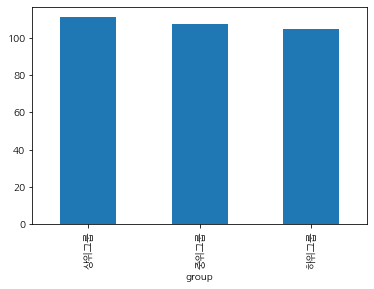

In [119]:
plt.rcParams['font.family'] = 'NanumGothic'   # 한글 깨짐 방지

pass_trial_by_group.plot.bar()

plt.show()

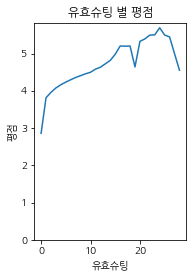

In [59]:
# 유효슈팅 별 평점
# plt.rcParams['font.family'] = 'NanumGothic'   # 한글 깨짐 방지

plt.subplot(1,2,2)
sns.lineplot(data = df.groupby("유효슈팅").mean()["평점"]).set_title("유효슈팅 별 평점")
plt.ylim(0,)

plt.show()

1) 유효슈팅-평점

2) 태클성공-득점수